# EDA on Diwali Sales data

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #for visualisation
%matplotlib inline
import seaborn as sns

In [13]:
data = pd.read_csv('https://raw.githubusercontent.com/Bindugowdacs/Python/main/Diwali%20Sales%20Data.csv',  encoding='unicode_escape')
# to avoid encoding error use - encoding='unicode_escape'

In [11]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [14]:
data.shape
# to check rows and columms - entries

(11251, 15)

In [15]:
#Data cleaning

In [17]:
data.info()
#gives information on data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [18]:
#status & unnmed columns are blank-no values in the columns, so we can drop it

In [21]:
data.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [22]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [27]:
#check the null values
pd.isnull(data).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [28]:
#now amount column has null values
data.dropna(inplace=True)
#inplace is to change the data in original dataset

In [31]:
data.shape

(11239, 13)

In [32]:
pd.isnull(data).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [35]:
data.Amount.dtype

dtype('float64')

In [36]:
#changing dtype to int
data['Amount']=data['Amount'].astype('int')

In [37]:
data.Amount.dtype

dtype('int64')

In [39]:
#to describe the data: mean, median, mode
data.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [41]:
#we need only valid column
data[['Age','Marital_Status','Orders','Amount']].describe()

,Age,Marital_Status,Orders,Amount
count,11239.000000,11239.000000,11239.000000,11239.000000
mean,35.410357,0.420055,2.489634,9453.610553
std,12.753866,0.493589,1.114967,5222.355168
min,12.000000,0.000000,1.000000,188.000000
25%,27.000000,0.000000,2.000000,5443.000000
50%,33.000000,0.000000,2.000000,8109.000000
75%,43.000000,1.000000,3.000000,12675.000000
max,92.000000,1.000000,4.000000,23952.000000


# EDA

#GENDER

In [44]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

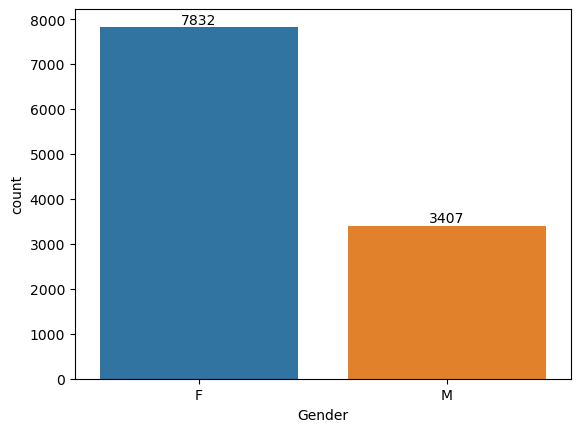

In [47]:
ax = sns.countplot(x='Gender', data = data)

#countplot chart with labels

for bars in ax.containers:
    ax.bar_label(bars)

In [50]:
data.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending = False)

,Gender,Amount
0,F,74335853
1,M,31913276


<AxesSubplot: xlabel='Gender', ylabel='Amount'>

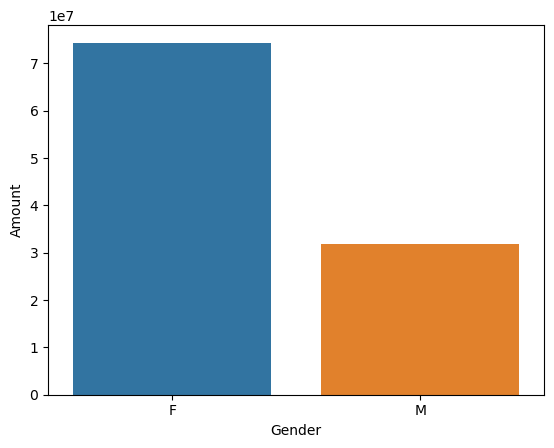

In [53]:
sales_gender = data.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending = False)

sns.barplot(x='Gender', y = 'Amount', data = sales_gender)

In [54]:
#From above graphs we can interpret like most of the purchase is done by females and their purchsing power is also high

#EDA on Age

In [55]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<AxesSubplot: xlabel='Age Group', ylabel='count'>

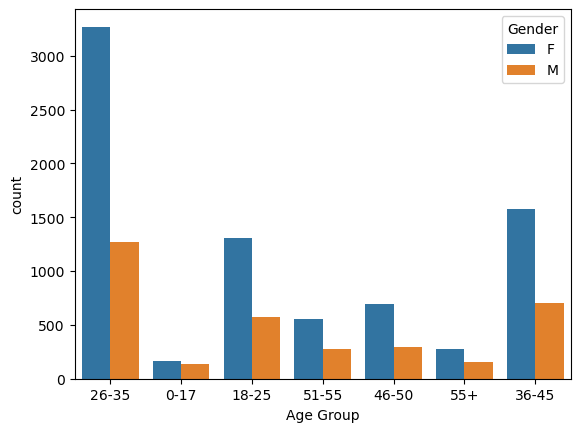

In [60]:
sns.countplot(data = data, x='Age Group', hue = 'Gender')

#hue = 'Gender' given to get labels

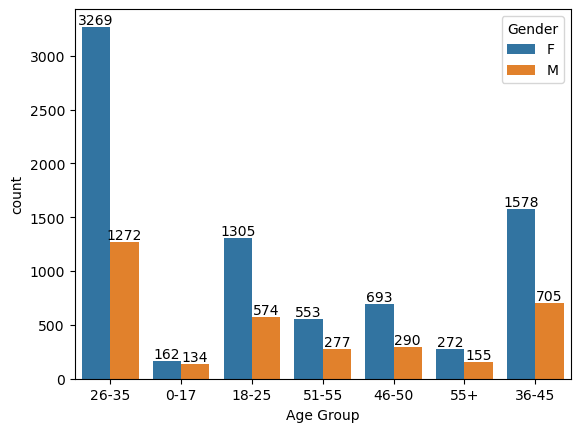

In [61]:
ax = sns.countplot(data = data, x='Age Group', hue = 'Gender')

#countplot chart with labels

for bars in ax.containers:
    ax.bar_label(bars)

In [62]:
#the age group of 26-35 has purchased more compared to other groups

<AxesSubplot: xlabel='Age Group', ylabel='Amount'>

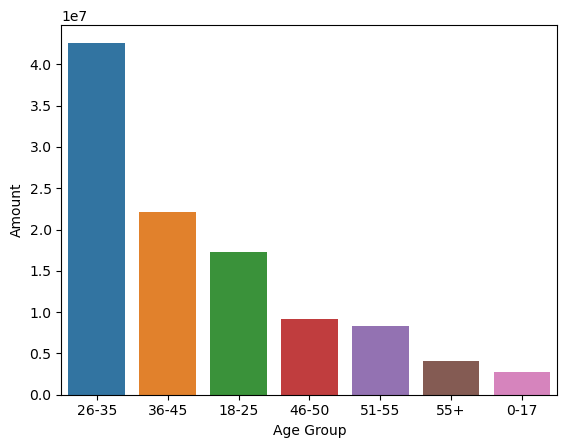

In [58]:
sales_age = data.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending = False)

sns.barplot(x='Age Group', y = 'Amount', data = sales_age)

In [63]:
#so from above grphs we can say that most of the buyers are from 26-35 age group

#State

In [64]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [69]:
#to get total no of orders from top 10 states
sales_state = data.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending = False)
sales_state.head()

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252


<AxesSubplot: xlabel='State', ylabel='Orders'>

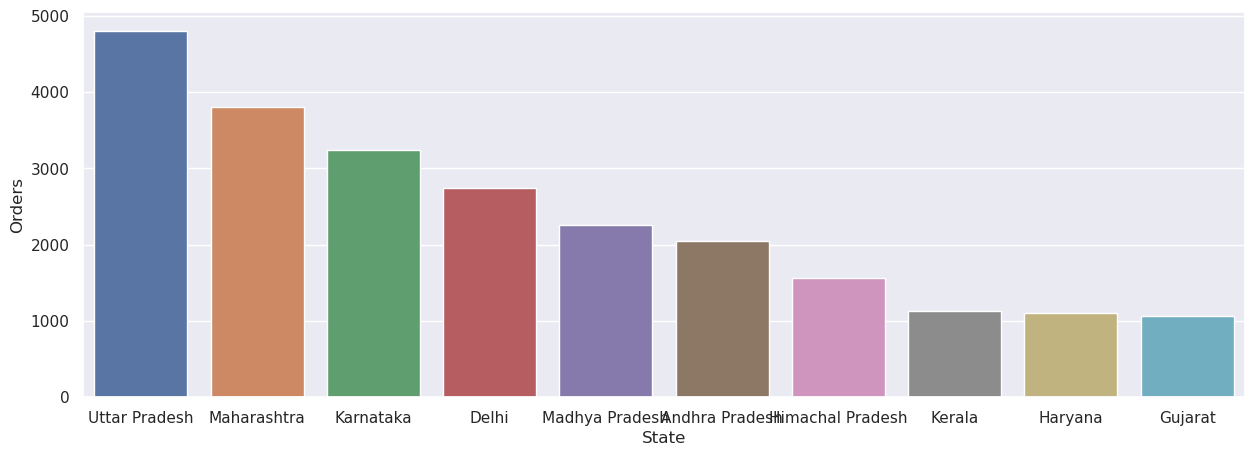

In [76]:
sales_state = data.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending = False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_state, x='State', y='Orders')

In [77]:
#to get total amount from top 10 states

<AxesSubplot: xlabel='State', ylabel='Amount'>

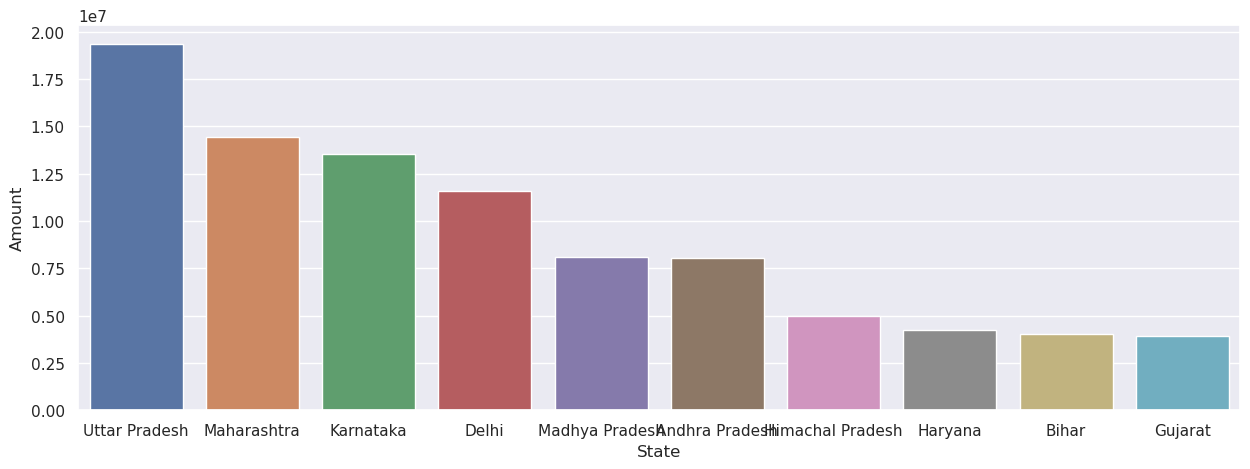

In [78]:
sales_state = data.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending = False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_state, x='State', y='Amount')

In [79]:
#from above graphs we can say that most of the orders & total sales amount are from UP, MH & KA respectively

#Marital status

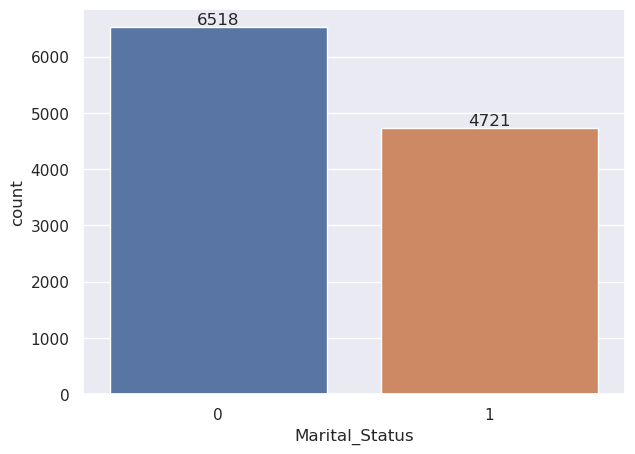

In [84]:
ax = sns.countplot(x='Marital_Status', data = data)

#countplot chart with labels
sns.set(rc={'figure.figsize':(5,5)})

for bars in ax.containers:
    ax.bar_label(bars)
    

<AxesSubplot: xlabel='Marital_Status', ylabel='Amount'>

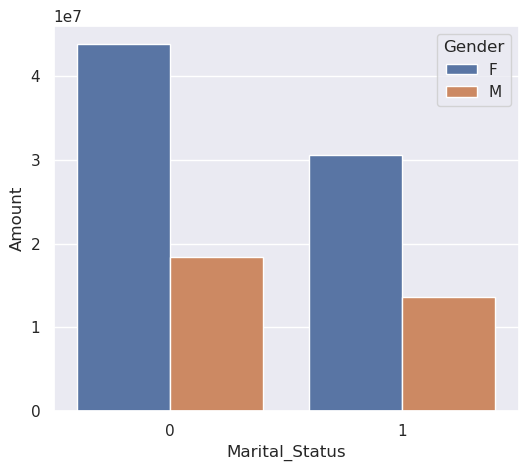

In [87]:
sales_Marital_Status = data.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending = False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data=sales_Marital_Status, x='Marital_Status', y='Amount', hue='Gender')

In [88]:
#from the above graph we can say that most of the buyers are unmarried women with high purchasing power

#Occupation

In [89]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

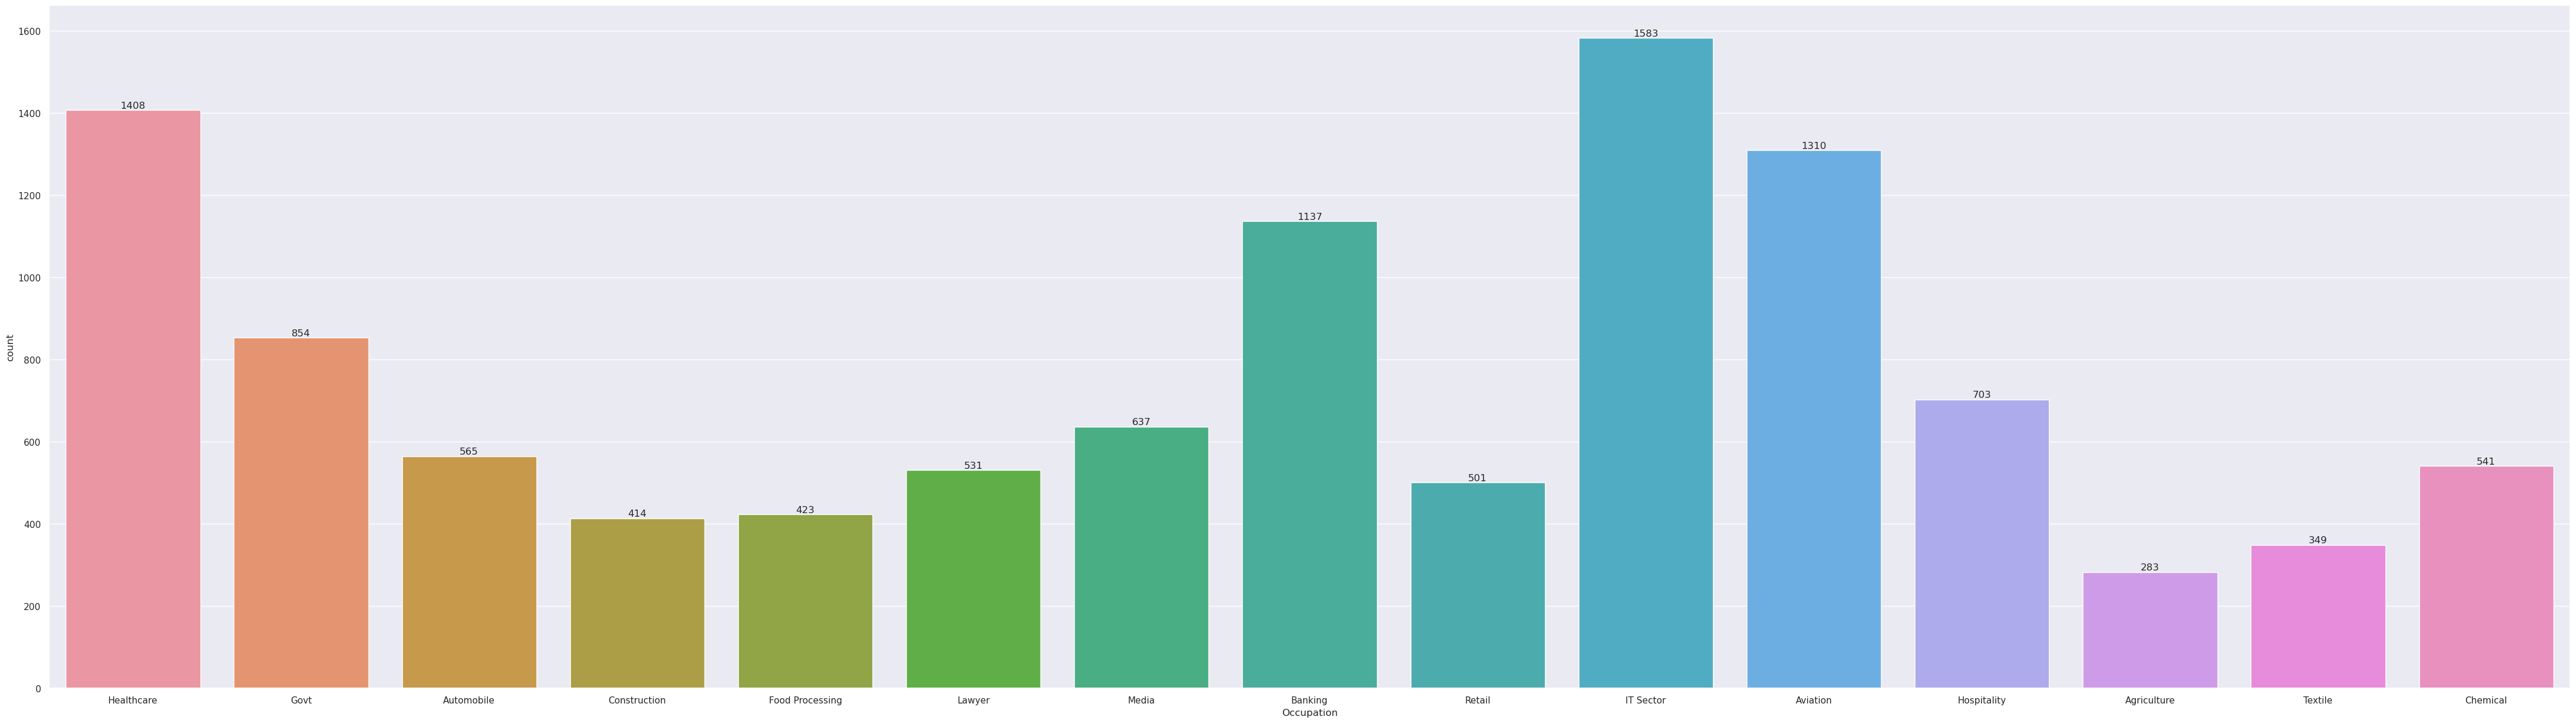

In [96]:
ax = sns.countplot(x='Occupation', data = data)

#countplot chart with labels
sns.set(rc={'figure.figsize':(20,5)})

for bars in ax.containers:
    ax.bar_label(bars)

In [97]:
#so we can say most of the buyers are from IT, Aviation & Health care

#Product category

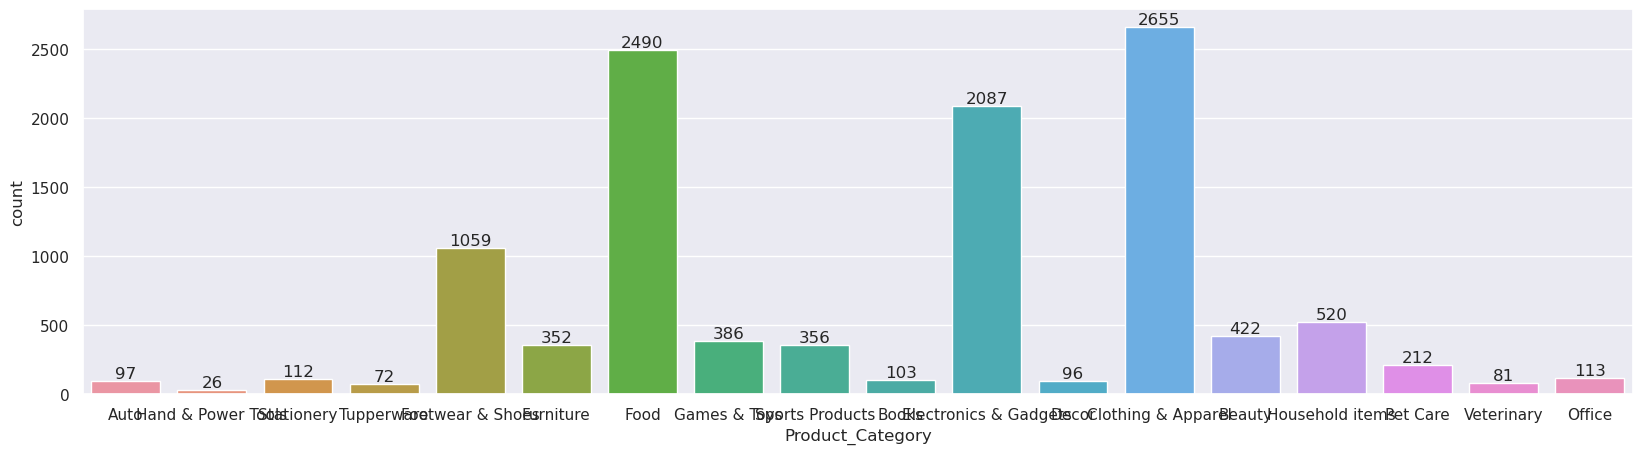

In [98]:
ax = sns.countplot(x='Product_Category', data = data)

#countplot chart with labels
sns.set(rc={'figure.figsize':(20,5)})

for bars in ax.containers:
    ax.bar_label(bars)

In [100]:
#so we can say most of the products sold are Food, footware & electronics

<AxesSubplot: xlabel='Product_Category', ylabel='Amount'>

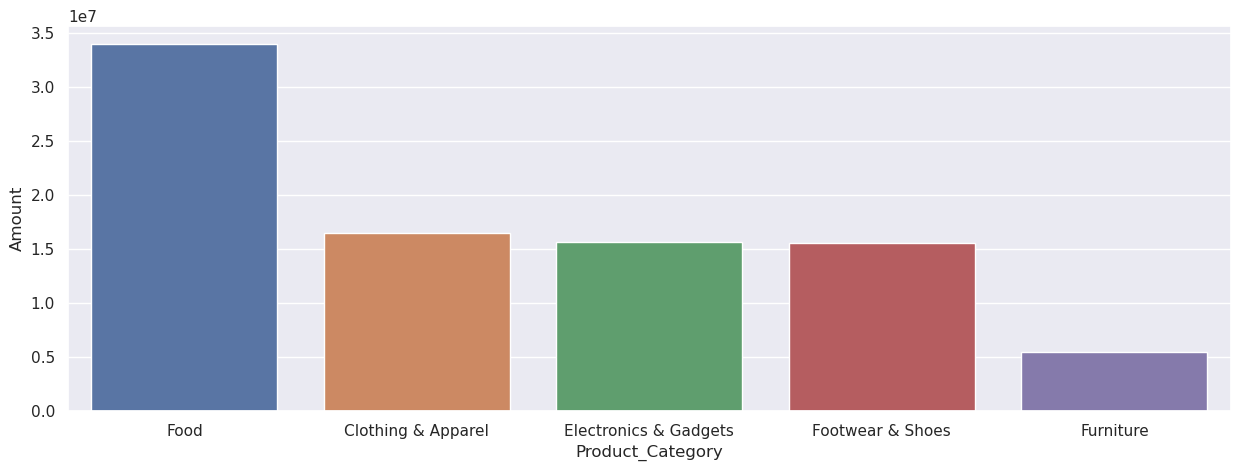

In [106]:
sales_Product_Category = data.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending = False).head(5)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_Product_Category, x='Product_Category', y='Amount')

In [105]:
#so we can say most of the products sold are Food, footware & electronics

#State

<AxesSubplot: xlabel='Product_ID', ylabel='Orders'>

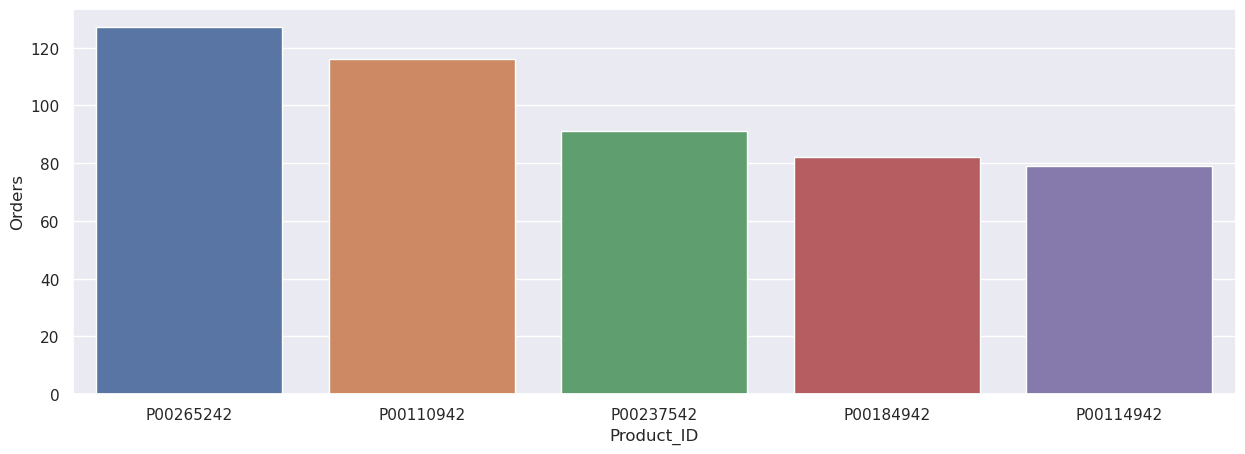

In [107]:
sales_State= data.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending = False).head(5)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_State, x='Product_ID', y='Orders')

In [109]:
#top sold products are shown above

# Conclusion

#Married women from age group 26-35 years from UP, MH, KA who are working in IT, Health care & Aviation are more likely to purchase from food, clothing & electronics category